In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('IMDB Dataset.csv') # loading the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df['sentiment'].value_counts() # checking the class blancing 

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
df['encoded_sen'] = df['sentiment'].map({'negative':0, 'positive':1}) # encoding the class lables
df.head()

,review,sentiment,encoded_sen
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [8]:
import nltk
nltk.download('punkt_tab') # for word tokens 

# function to create word tokens
def tokens(review):
    token = nltk.word_tokenize(review)
    return token

df['Tokens'] = df['review'].apply(tokens)
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cappr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,sentiment,encoded_sen,Tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,1,"[A, wonderful, little, production, ., <, br, /..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,0,"[Basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[Petter, Mattei, 's, ``, Love, in, the, Time, ..."


In [9]:
from collections import Counter

all_words = [] # list to store all the words
# loop to get each words into a list
for words in df['Tokens']:
    all_words.extend(words)

word_counts = Counter(all_words) # counting the words
print(word_counts.most_common(5)) # displaying top 5 words


[('the', 573398), (',', 544030), ('.', 467982), ('and', 309118), ('a', 309103)]


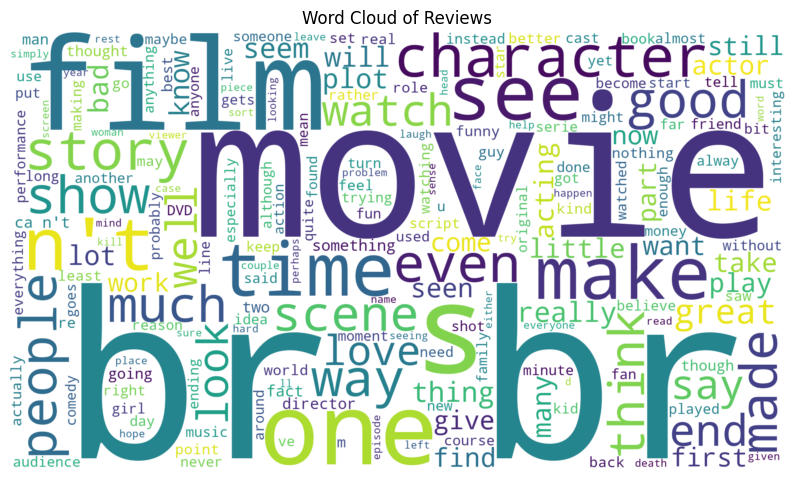

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
text_string = ' '.join(all_words)

# word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(text_string)

# Displaying the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [11]:
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function to create a clean tokens which do not have HTML tags and stop words and are only words.
def tokens(review):
    clean_text = BeautifulSoup(str(review), 'html.parser').get_text() # this will remove HTML tags
    tokens = nltk.word_tokenize(str(clean_text)) # tokenize the cleaned text
    cleaned_token = [t for t in tokens if t.lower() not in stop_words and t.isalnum()] # only getting tokens which are not in stop words and are not numbers
    return cleaned_token

df['Cleaned_tokens'] = df['review'].apply(tokens)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cappr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment,encoded_sen,Tokens,Cleaned_tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[One, of, the, other, reviewers, has, mentione...","[One, reviewers, mentioned, watching, 1, Oz, e..."
1,A wonderful little production. <br /><br />The...,positive,1,"[A, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,0,"[Basically, there, 's, a, family, where, a, li...","[Basically, family, little, boy, Jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, Time, Money, visually, ..."


[('movie', 83823), ('film', 75966), ('one', 47098), ('like', 37661), ('good', 27577)]


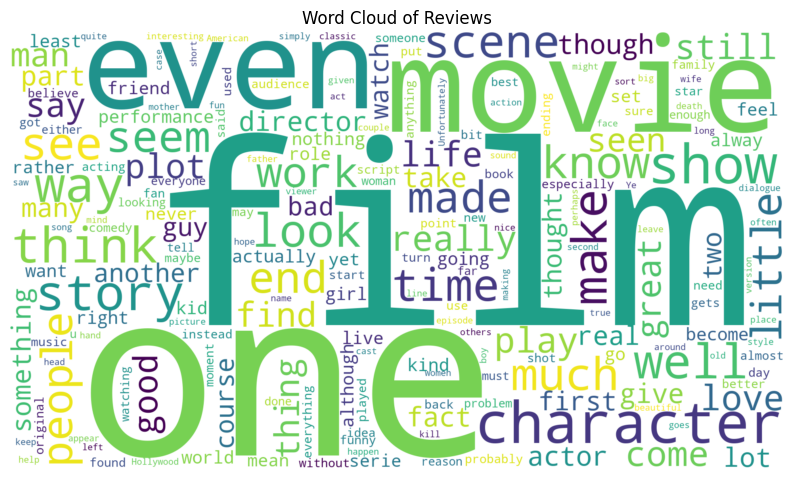

In [12]:
from collections import Counter

all_words1 = [] # list to store all the words
# loop to get each words into a list
for words in df['Cleaned_tokens']:
    all_words1.extend(words)

word_counts1 = Counter(all_words1) # counting the words
print(word_counts1.most_common(5)) # displaying top 5 words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
text_string1 = ' '.join(all_words1)

# word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(text_string1)

# Displaying the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [13]:
import re

"""
i used this fuctions to create a clean text which do not have HTML tags and numbers,
so i can use it to generate embedding of a whole review not every tokens because my computer was keep crashing, 
so to reduce the load on my pc and still get meaningful embedings.
"""
def clean_text(review):
    if pd.isna(review):
        return ''
    clean_text = BeautifulSoup(str(review), 'html.parser').get_text()
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', clean_text) # this just replace any charactore other than letter, number or whitespace with empty string thus giving cleaned text
    return clean_text

df['Cleaned_text'] = df['review'].apply(clean_text)
df.head()

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment,encoded_sen,Tokens,Cleaned_tokens,Cleaned_text
0,One of the other reviewers has mentioned that ...,positive,1,"[One, of, the, other, reviewers, has, mentione...","[One, reviewers, mentioned, watching, 1, Oz, e...",One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,"[A, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn...",A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,1,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,"[Basically, there, 's, a, family, where, a, li...","[Basically, family, little, boy, Jake, thinks,...",Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, Time, Money, visually, ...",Petter Matteis Love in the Time of Money is a ...


In [14]:
from gensim.models import KeyedVectors # for word2vec embeding model
import gensim.downloader as api # to get pretrained embeding model
import numpy as np 

word2vec = api.load('word2vec-google-news-300') # pretrained embeding model 

# fuction to get embeddings
def get_emb(tokens):
    """
    i used the try catch caluse because this model gives a static embeding vector as output.
    but it does not cover all the words, so i was getting some error that this word do not have embeding vector in the model.
    so i created this, if a word do not have embeding it will simplly just skip it.
    and this model will give embeding for each and evry tokens, and to create a review level embeding i just took the average 
    of all the tokens.
    """
    embeddings = []
    for t in tokens:
        try:
            embeddings.append(word2vec[t])
        except KeyError:
            continue  # Skip out-of-vocabulary tokens
    return np.mean(embeddings, axis=0) 

df['embeddings'] = df['Cleaned_tokens'].apply(get_emb)
df.head(10)

,review,sentiment,encoded_sen,Tokens,Cleaned_tokens,Cleaned_text,embeddings
0,One of the other reviewers has mentioned that ...,positive,1,"[One, of, the, other, reviewers, has, mentione...","[One, reviewers, mentioned, watching, 1, Oz, e...",One of the other reviewers has mentioned that ...,"[0.063029535, 0.045839474, 0.036854073, 0.0772..."
1,A wonderful little production. <br /><br />The...,positive,1,"[A, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn...",A wonderful little production The filming tech...,"[0.08965986, 0.05058406, -0.03002558, 0.067997..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",I thought this was a wonderful way to spend ti...,"[0.0503962, 0.042520404, -0.016267564, 0.10680..."
3,Basically there's a family where a little boy ...,negative,0,"[Basically, there, 's, a, family, where, a, li...","[Basically, family, little, boy, Jake, thinks,...",Basically theres a family where a little boy J...,"[0.08768006, 0.024042765, -0.028838856, 0.1048..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, Time, Money, visually, ...",Petter Matteis Love in the Time of Money is a ...,"[0.059846636, 0.026709933, -0.007287162, 0.076..."
5,"Probably my all-time favorite movie, a story o...",positive,1,"[Probably, my, all-time, favorite, movie, ,, a...","[Probably, favorite, movie, story, selflessnes...",Probably my alltime favorite movie a story of ...,"[0.084820084, 0.01693212, 0.013673342, 0.10608..."
6,I sure would like to see a resurrection of a u...,positive,1,"[I, sure, would, like, to, see, a, resurrectio...","[sure, would, like, see, resurrection, dated, ...",I sure would like to see a resurrection of a u...,"[0.037828416, 0.050337337, 0.0360054, 0.092673..."
7,"This show was an amazing, fresh & innovative i...",negative,0,"[This, show, was, an, amazing, ,, fresh, &, in...","[show, amazing, fresh, innovative, idea, 70, f...",This show was an amazing fresh innovative ide...,"[0.029269781, 0.033190604, 0.0084945485, 0.078..."
8,Encouraged by the positive comments about this...,negative,0,"[Encouraged, by, the, positive, comments, abou...","[Encouraged, positive, comments, film, looking...",Encouraged by the positive comments about this...,"[0.05971222, 0.030951181, -0.0031642914, 0.098..."
9,If you like original gut wrenching laughter yo...,positive,1,"[If, you, like, original, gut, wrenching, laug...","[like, original, gut, wrenching, laughter, lik...",If you like original gut wrenching laughter yo...,"[0.122312546, 0.0061798096, 0.0101566315, 0.17..."


In [15]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# spliting the data into training, validation and test set
# the temp df contains 30% of overall data which i then divided into validation and test data 
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['encoded_sen'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['encoded_sen'])

# getting the actual splits and converting them to list and numpy array for the model
X_train = np.array(train_df['embeddings'].tolist())  
y_train = np.array(train_df['encoded_sen'])          
X_val = np.array(val_df['embeddings'].tolist())      
y_val = np.array(val_df['encoded_sen'])              
X_test = np.array(test_df['embeddings'].tolist())    
y_test = np.array(test_df['encoded_sen'])            

In [16]:
# Reshape for LSTM (num_samples, timesteps, features)
X_train = X_train[:, np.newaxis, :]  
X_val = X_val[:, np.newaxis, :]      
X_test = X_test[:, np.newaxis, :]    

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35000, 1, 300)
y_train shape: (35000,)
X_val shape: (7500, 1, 300)
y_val shape: (7500,)
X_test shape: (7500, 1, 300)
y_test shape: (7500,)


In [17]:
batch_size = 32

# dividing data into batch for train, validation and test split
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM model
model = Sequential([
    LSTM(units=128, input_shape=(1, 300), return_sequences=False),  # Single-timestep LSTM
    Dropout(0.3), 
    Dense(64, activation='relu'),  
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                5

In [21]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/10


1094/1094 [==============================] - 8s 5ms/step - loss: 0.4311 - accuracy: 0.8070 - val_loss: 0.3597 - val_accuracy: 0.8473
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3727 - accuracy: 0.8426 - val_loss: 0.3538 - val_accuracy: 0.8471
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3635 - accuracy: 0.8482 - val_loss: 0.3728 - val_accuracy: 0.8416
Epoch 4/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3591 - accuracy: 0.8501 - val_loss: 0.3816 - val_accuracy: 0.8280
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3595 - accuracy: 0.8501 - val_loss: 0.3468 - val_accuracy: 0.8500
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3544 - accuracy: 0.8505 - val_loss: 0.3460 - val_accuracy: 0.8459
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3521 - accuracy: 0.8528 - val_loss: 0.3516 - val_accurac

In [22]:
# model performance 
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

235/235 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8441
Test Loss: 0.3454
Test Accuracy: 0.8441


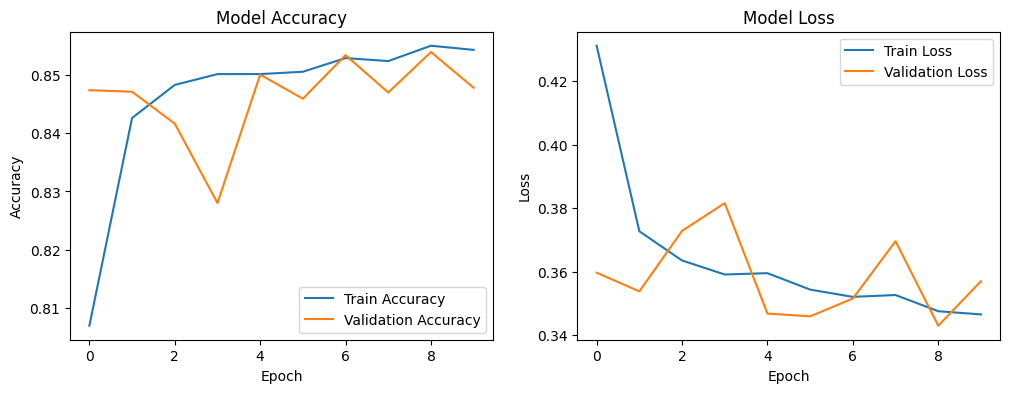

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# ploting accuracy of train and validation over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# ploting loss of train and validation over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# i have created some new review to test the model.

new_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the plot kept me hooked.",
    "Terrible film, boring and predictable. Waste of time.",
    "I loved the cinematography, but the story was a bit weak.",
    "Awful movie, the characters were annoying and the dialogue was cringeworthy.",
    "A masterpiece! Emotional, thrilling, and beautifully directed.",
    "Not worth watching. The pacing was slow and the ending was disappointing.",
    "Great cast and fun moments, but it lacked depth.",
    "One of the worst films I've seen. No coherence in the storyline.",
    "An enjoyable movie with a heartwarming message.",
    "Mediocre at best. It had potential but failed to deliver."
]

new_df = pd.DataFrame({'review': new_reviews})

In [25]:
# applying all the preprocessing steps 

new_df['Cleaned_text'] = new_df['review'].apply(clean_text)
new_df['Cleaned_tokens'] = new_df['review'].apply(tokens)
new_df['embeddings'] = new_df['Cleaned_tokens'].apply(get_emb)

In [26]:
# embeddings
X_new = np.array(new_df['embeddings'].tolist())  

# Reshaping for LSTM input
X_new = X_new[:, np.newaxis, :]  

In [27]:
# Predicting sentiments of new data 
predictions = model.predict(X_new) 
predicted_labels = (predictions > 0.5).astype(int).flatten()  
sentiment_map = {0: 'negative', 1: 'positive'}

1/1 [==============================] - 1s 646ms/step


In [28]:
pd.set_option('display.max_rows', None)        
pd.set_option('display.max_columns', None)     
pd.set_option('display.max_colwidth', None)    

# storing the results into a new dataframe to display at the end.
results_df = pd.DataFrame({
    'Review': new_reviews,
    'Predicted Sentiment': [sentiment_map[label] for label in predicted_labels],
    'Probability (Positive)': predictions.flatten()
})

print("\nPrediction Results:")
print(results_df)


Prediction Results:
                                                                                    Review  \
0  This movie was absolutely fantastic! The acting was superb and the plot kept me hooked.   
1                                    Terrible film, boring and predictable. Waste of time.   
2                                I loved the cinematography, but the story was a bit weak.   
3             Awful movie, the characters were annoying and the dialogue was cringeworthy.   
4                           A masterpiece! Emotional, thrilling, and beautifully directed.   
5                Not worth watching. The pacing was slow and the ending was disappointing.   
6                                         Great cast and fun moments, but it lacked depth.   
7                         One of the worst films I've seen. No coherence in the storyline.   
8                                          An enjoyable movie with a heartwarming message.   
9                                Medioc

In [ ]:
"""
Model performance is good. however the loss and acc chart shows fluctuation in validation but at the end it turn out a good
model. The most challanging part was getting the embedings i tried to use differnet method on my own like TFIDF, training 
my own word2vec model on this dataset, also use transformers, but all of this was too much for my pc, my pc was keep crashing
and i cant seem to finish embeding task, so i settled with a static pretrained embeding model from word2vec and training is 
the esiest part as my data is ready i just have to wait to see the training results, i adjusted the model based on training 
result, and tested the model on new unseen review that i have written. it worked greate on.
"""